In [3]:
from performance_utils import reshape_summary, plot_summary, reformat_multigroup_df, plot_grouped_metric_barplot, plot_grouped_average_barplot, grouped_value_counts, plot_stacked_dumbbell 
import pandas as pd

In [4]:
df_averaged = pd.read_csv('inputs/multi_grouped_split_averaged_2108.csv')
df_full = pd.read_csv('inputs/all_data_multi_grouped_split_2108.csv')[['measure', 'set', 'Name', 'test_best_model_acc', 'test_best_model_f1',
       'test_best_model_mcc', 'test_best_model_precision','test_best_model_recall']]
df_model_comparisons = pd.read_csv('inputs/model_comparison_summary.csv')
test_preds = pd.read_csv('inputs/random_esm2_mlp1_predictions/fold_0/test_set_predict.csv')

# Data Split Comparisons

In [6]:
df_random = df_full[df_full['Name'].isin(['random_ctrl','random'])]
df_homology = df_full[df_full['Name'].isin(['homology_ctrl','homology'])]
df_organism = df_full[df_full['Name'].isin(['organism_ctrl','organism'])]
df_antibiotic = df_full[df_full['Name'].isin(['antibiotic_ctrl','antibiotic'])]
df_gene = df_full[df_full['Name'].isin(['gene_ctrl','gene'])]

In [7]:
df_pivoted_random = reformat_multigroup_df(df_random)
df_pivoted_homology = reformat_multigroup_df(df_homology)
df_pivoted_organism = reformat_multigroup_df(df_organism)
df_pivoted_antibiotic = reformat_multigroup_df(df_antibiotic)
df_pivoted_gene = reformat_multigroup_df(df_gene)

In [8]:
df_pivoted_random.head()

,set,Split,Metric,average,stdev
0,1,random,Acc,0.880000,0.009186
1,1,random,F1,0.867502,0.010794
2,1,random,Mcc,0.758387,0.019033
3,1,random,Precision,0.852505,0.008371
4,1,random,Recall,0.883146,0.017040


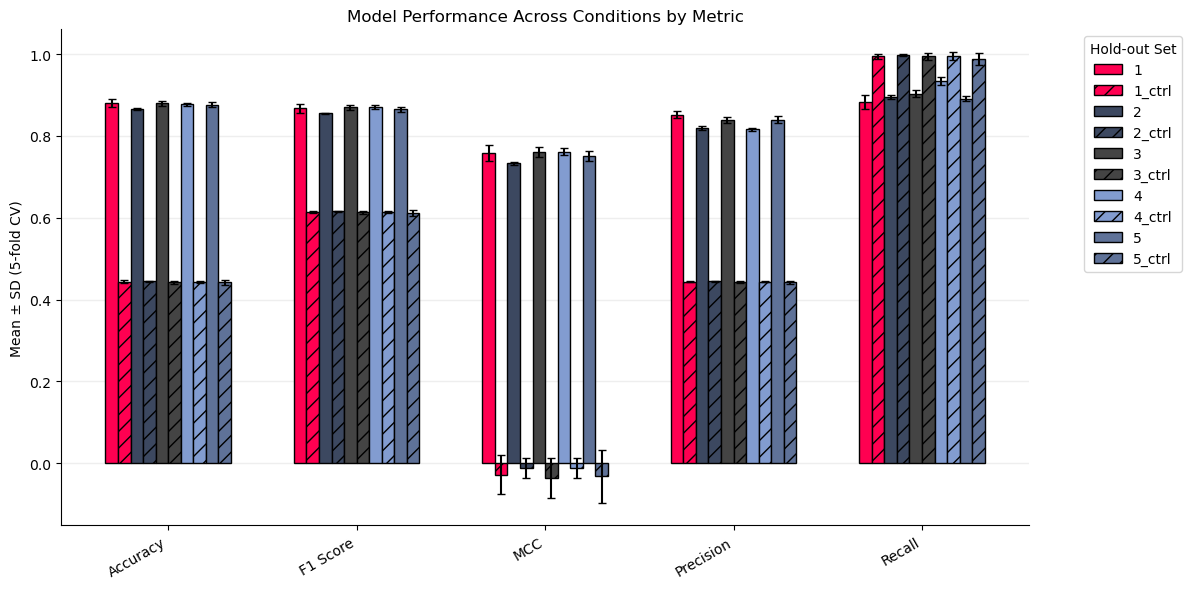

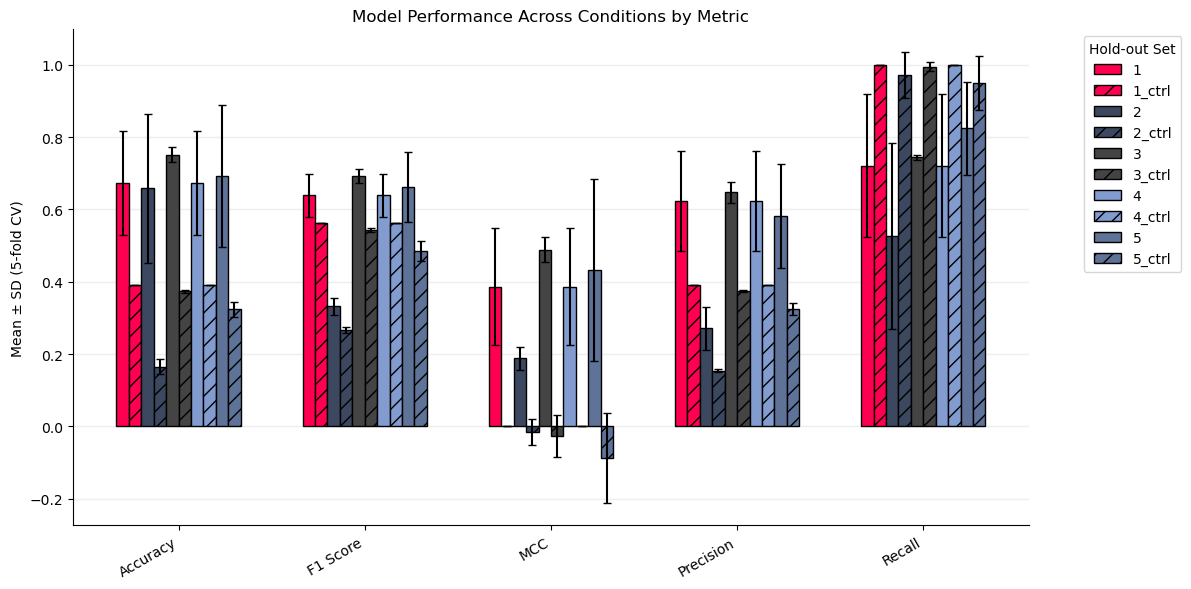

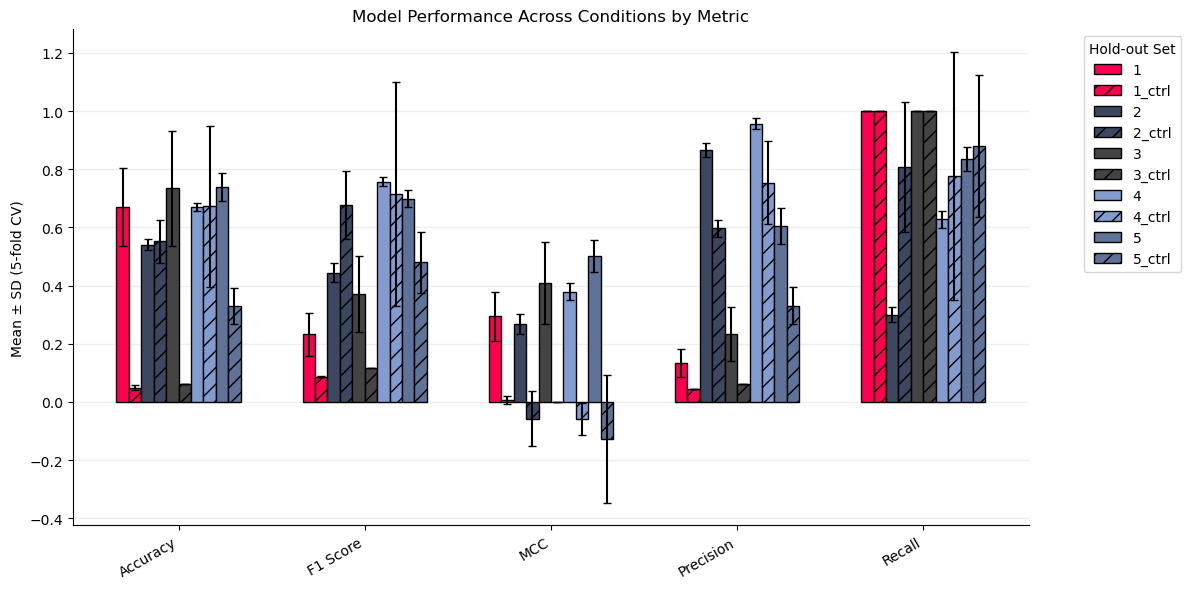

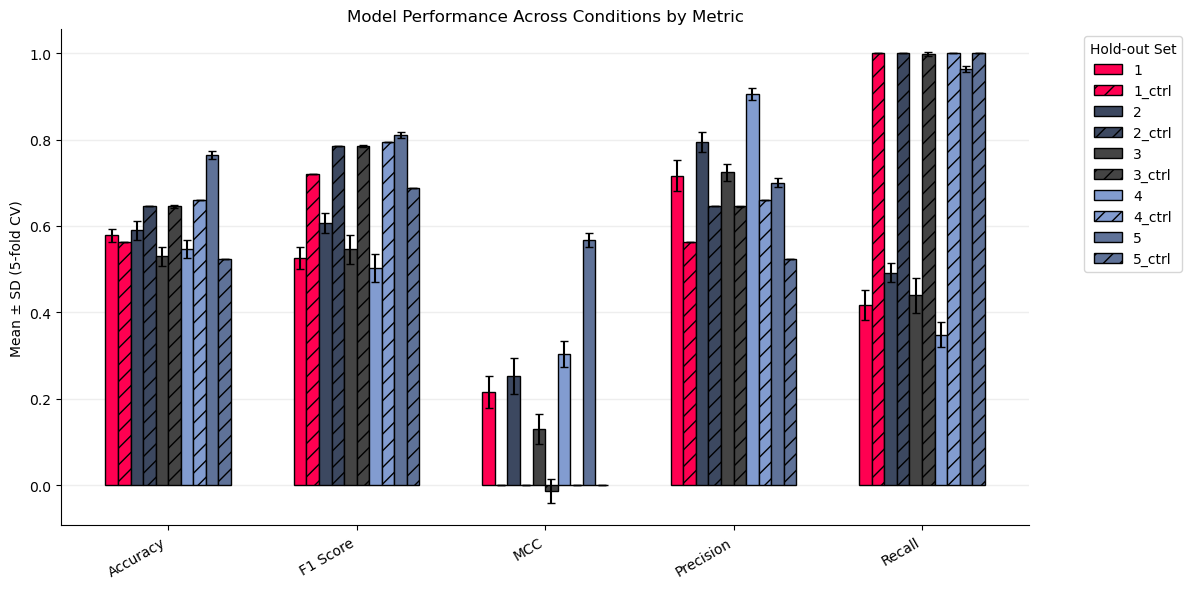

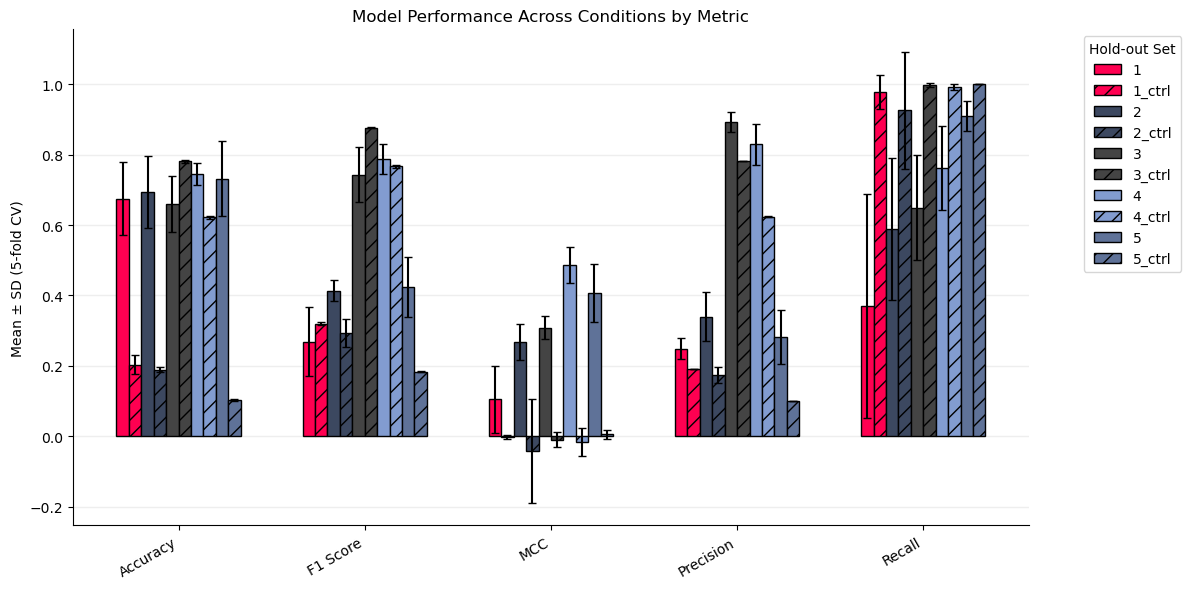

In [9]:
for df in [df_pivoted_random, df_pivoted_homology, df_pivoted_organism, df_pivoted_antibiotic, df_pivoted_gene]:
    plot_grouped_metric_barplot(df)

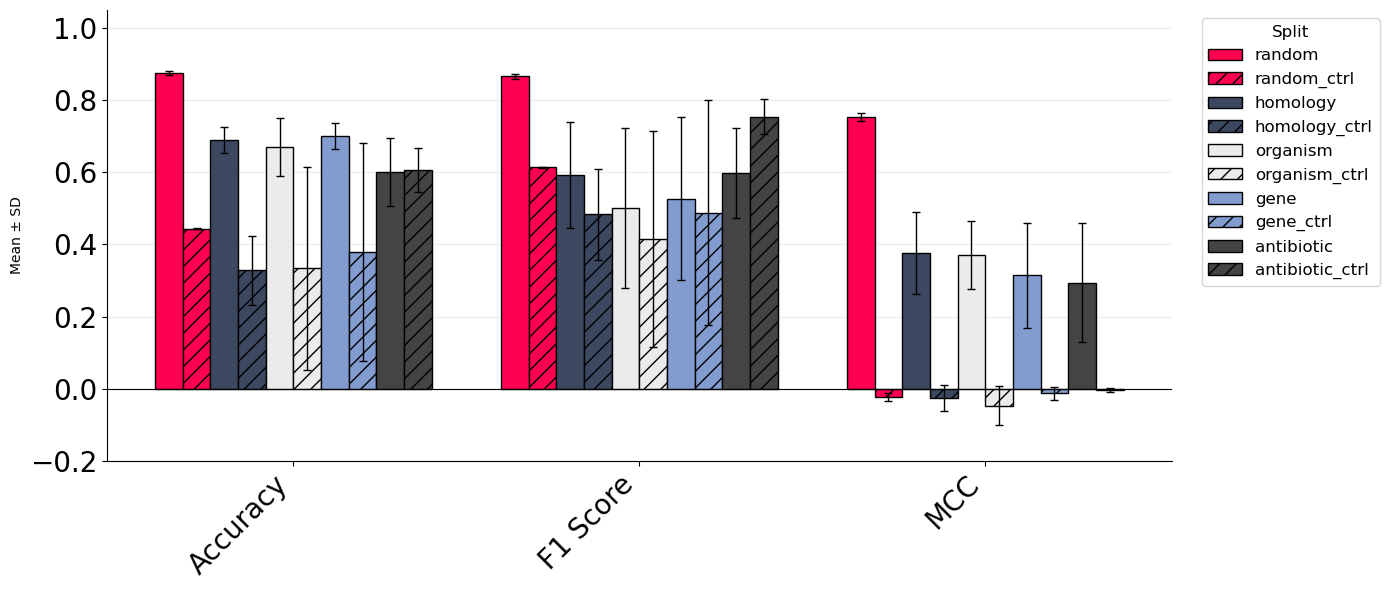

In [10]:
fig, ax = plot_grouped_average_barplot(
    df_averaged,
    save_path="holdout_avgs.png",
)

# Model Comparisons

In [12]:
df_model_comparisons.head()

,Name,test_best_model_acc,test_best_model_f1,test_best_model_mcc,test_best_model_precision,test_best_model_recall,train_best_model_acc,train_best_model_f1,train_best_model_mcc,train_best_model_precision,train_best_model_recall,validation_best_model_acc,validation_best_model_f1,validation_best_model_mcc,validation_best_model_precision,validation_best_model_recall
0,Average ESM2 MLP2Lyr,0.869500,0.857913,0.738745,0.832161,0.885393,0.958832,0.954480,0.918775,0.923500,0.987697,0.862228,0.851172,0.727585,0.807156,0.900506
1,Stdev ESM2 MLP2Lyr,0.005420,0.006036,0.010990,0.007572,0.010206,0.011897,0.012977,0.023331,0.018767,0.007295,0.015480,0.014593,0.028338,0.023114,0.004680
2,Average ESM2 GBC,0.868000,0.847604,0.732337,0.871978,0.824719,1.000000,1.000000,1.000000,1.000000,1.000000,0.849728,0.830444,0.696036,0.820245,0.841326
3,Stdev ESM2 GBC,0.010518,0.011462,0.021443,0.017554,0.012179,0.000000,0.000000,0.000000,0.000000,0.000000,0.022707,0.023215,0.044609,0.033902,0.017930
4,Average ESM2 SVC,0.770000,0.778846,0.574838,0.680700,0.910112,0.990489,0.989232,0.980904,0.978698,1.000000,0.783967,0.787939,0.601296,0.690450,0.917857


In [13]:
df_plot_model_comp = reshape_summary(df_model_comparisons, metrics=[
    'test_best_model_acc','test_best_model_f1',
    'test_best_model_precision',
    'test_best_model_recall','test_best_model_mcc',
])

In [14]:
df_plot_model_comp

,model,metric_name,mean,sd
0,ESM2 MLP2Lyr,test_best_model_acc,0.869500,0.005420
1,ESM2 GBC,test_best_model_acc,0.868000,0.010518
2,ESM2 SVC,test_best_model_acc,0.770000,0.005000
3,ESM2 BRF,test_best_model_acc,0.712000,0.014513
4,ESM2 MLP1Lyr,test_best_model_acc,0.879000,0.010247
5,ESM1b MLP1Lyr,test_best_model_acc,0.866000,0.004541
6,Saprot MLP1Lyr,test_best_model_acc,0.839000,0.008216
7,ESM2 MLP2Lyr,test_best_model_f1,0.857913,0.006036
8,ESM2 GBC,test_best_model_f1,0.847604,0.011462
9,ESM2 SVC,test_best_model_f1,0.778846,0.004619


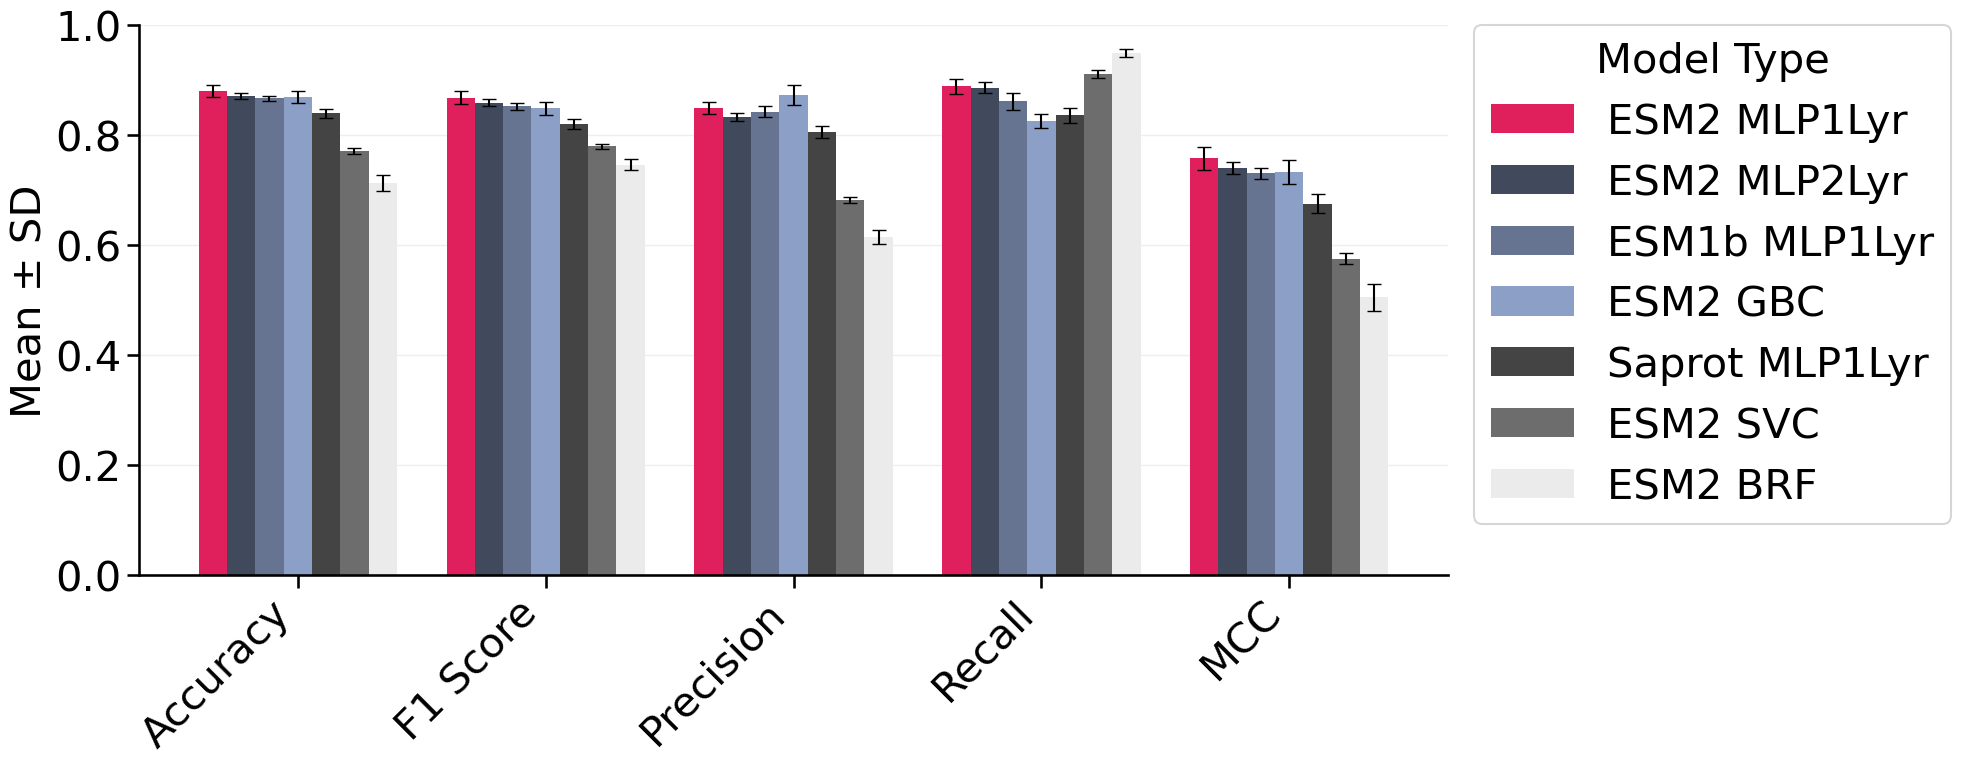

(<Figure size 2000x800 with 1 Axes>, <Axes: ylabel='Mean ± SD'>)

In [15]:
plot_summary(
    df_plot_model_comp,
    metrics_order=[
        'test_best_model_acc','test_best_model_f1',
        'test_best_model_precision',
        'test_best_model_recall','test_best_model_mcc'
    ],
    metric_labels=['Accuracy','F1 Score','Precision','Recall','MCC'],
    palette=[
        '#FF0051','#3C4860','#5F7298','#829CD0','#444444','#6D6D6D','#EBEBEB'],
    save_path="model_comp"
)

## Organism / gene breakdown

In [17]:
test_preds_expanded = test_preds.merge(test_preds['target_id'].str.split('.',expand=True), right_index=True, left_index=True)
test_preds_expanded = test_preds_expanded.rename(columns={0:'Organism',1:'Gene',2:'Mutation'})
test_preds_expanded['Org_Gene'] = test_preds_expanded['Organism']+'.'+test_preds_expanded['Gene']

In [18]:
df_by_gene = grouped_value_counts(
    df=test_preds_expanded,
    group_by='Gene',
    value_col='binary_predictions',
    zero_label='neg',
    one_label='pos',
    prefix='n_pred'
)

df_by_org = grouped_value_counts(
    df=test_preds_expanded,
    group_by='Organism',
    value_col='binary_predictions',
    zero_label='neg',
    one_label='pos',
    prefix='n_pred'
)

actual_by_gene = grouped_value_counts(
    df=test_preds_expanded,
    group_by='Gene',
    value_col='labels',
    zero_label='neg',
    one_label='pos',
    prefix='n_actual'
)
actual_by_org = grouped_value_counts(
    df=test_preds_expanded,
    group_by='Organism',
    value_col='labels',
    zero_label='neg',
    one_label='pos',
    prefix='n_actual'
)

full_org_count = df_by_org.merge(actual_by_org, on='Organism')
full_gene_count = df_by_gene.merge(actual_by_gene, on='Gene')

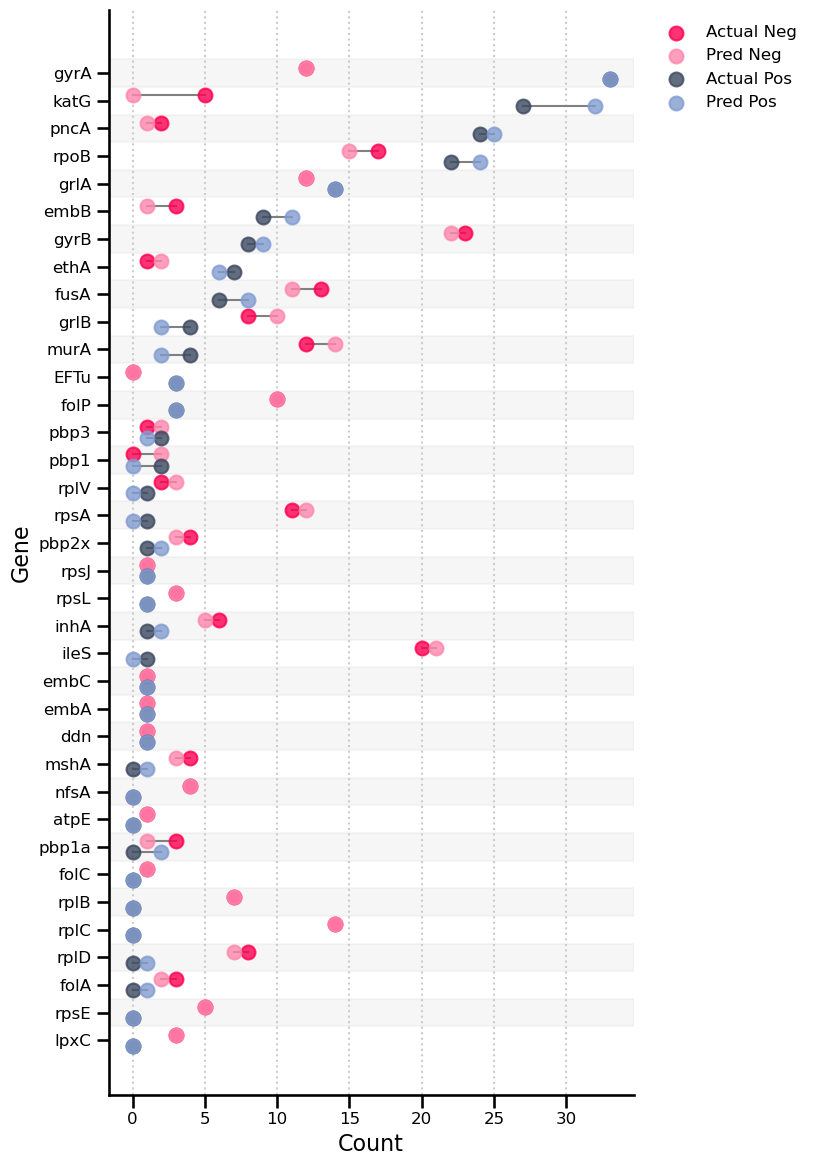

In [19]:
plot_stacked_dumbbell(
    df=full_gene_count,
    group_col="Gene",
    actual_neg="n_actual_neg",
    pred_neg="n_pred_neg",
    actual_pos="n_actual_pos",
    pred_pos="n_pred_pos",
    color_an="#FF0051",   # dark pink for actual neg
    color_pn="#FF87AD",   # lighter pink for pred neg
    color_ap="#3C4860",   # actual pos (dark vlur)
    color_pp="#829CD0",   # pred pos (light blur)
    offset=0.2,
    figsize=(8.5,12),
    font_size=12
)

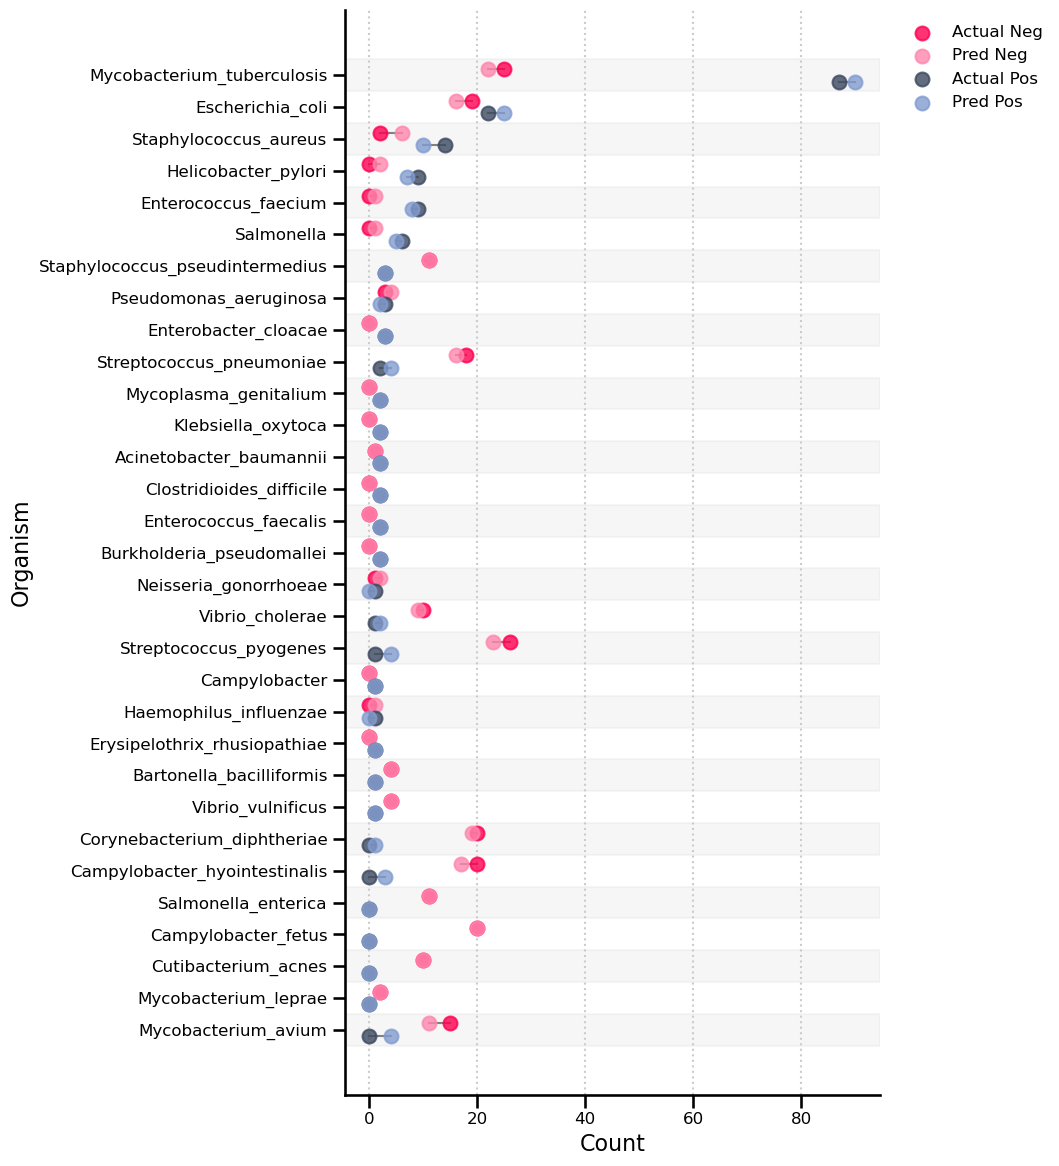

In [20]:
plot_stacked_dumbbell(
    df=full_org_count,
    group_col="Organism",
    actual_neg="n_actual_neg",
    pred_neg="n_pred_neg",
    actual_pos="n_actual_pos",
    pred_pos="n_pred_pos",
    color_an="#FF0051",   
    color_pn="#FF87AD",  
    color_ap="#3C4860",   
    color_pp="#829CD0",   
    offset=0.2,
    figsize=(11,12),
    font_size=12
)